**Datasets**
- [Fish Market Dataset](https://www.kaggle.com/datasets/vipullrathod/fish-market) – species, weight, and measurements  
- [Medical Insurance Costs](https://www.kaggle.com/datasets/mirichoi0218/insurance) – age, BMI, smoking status, charges  

**Exercises**
1. Load dataset with `pandas`. Convert a column to NumPy.  
2. Compute mean and standard deviation of one feature.  
3. Normalize a column (subtract mean, divide by std).  
4. Use NumPy to compute correlation matrix between features.  
5. Perform a linear regression: predict fish weight from length and height.  
6. Perform a multiple regression: predict insurance charges from BMI, age, children.  

**Stretch Challenges**
- Write a function to standardize all numerical features.  
- Split dataset into train/test sets and compute mean squared error.  
- Compare manual regression to `sklearn.linear_model.LinearRegression`.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
fishmarket = pd.read_csv('../datasets/fish.csv')
fishmarket

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


array([[1.        , 0.62537792],
       [0.62537792, 1.        ]])

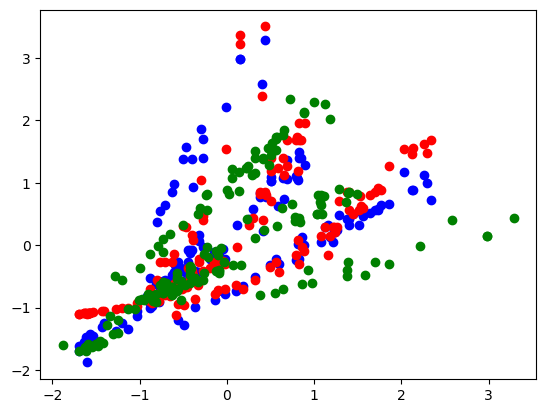

In [3]:
def column_to_normed(df, name):
    array = np.array(df[str(name)])
    return (array - np.mean(array)) / np.std(array)



normed_weight = column_to_normed(fishmarket, 'Weight')
normed_length = column_to_normed(fishmarket, 'Length1')
normed_height = column_to_normed(fishmarket, 'Height')



plt.scatter(normed_height, normed_length, label = 'height x length', color = 'blue')
plt.scatter(normed_height, normed_weight, label = 'height x weight', color = 'red')
plt.scatter(normed_length, normed_height, label = 'length x height', color = 'green')

np.corrcoef(normed_height, normed_length)

In [4]:
x = fishmarket[['Height', 'Length1']]


y = fishmarket['Weight']

regr = linear_model.LinearRegression()
regr.fit(x, y)

pred_weight = regr.predict([[11, 29]])

pred_weight

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([515.45343544])

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6609.90250539])

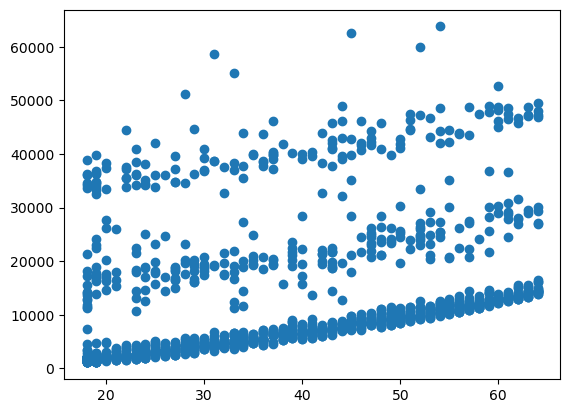

In [5]:
insurance = pd.read_csv('../datasets/insurance.csv')

plt.scatter(insurance['age'], insurance['charges'])

x = insurance[['age', 'bmi', 'children']]

y = insurance['charges']

regrinsurance = linear_model.LinearRegression()
regrinsurance.fit(x, y)

def pred_charge(age, bmi, children):
    return regrinsurance.predict([[age, bmi, children]])

pred_charge(19, 27, 0)

**Stretch Challenges**
- Write a function to standardize all numerical features.  
- Split dataset into train/test sets and compute mean squared error.  
- Compare manual regression to `sklearn.linear_model.LinearRegression`.  


In [6]:
winequality = pd.read_csv('../datasets/winequalityred.csv')

def normalize_df(df):
    for column in df.columns:
        df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])
    return df

training_set = winequality.iloc[0:1200][['fixed acidity', 'free sulfur dioxide', 'pH', 'quality']]

quality_mean = np.mean(training_set['quality'])
quality_std = np.std(training_set['quality'])

training_set = normalize_df(training_set)
testing_set = normalize_df(winequality.iloc[1201:][['fixed acidity', 'free sulfur dioxide', 'pH', 'quality']])

# print(training_set)
# print(testing_set)

x = training_set[['fixed acidity', 'free sulfur dioxide', 'pH']]

y = training_set['quality']


regrquality = linear_model.LinearRegression()
regrquality.fit(x, y)
def pred_qual(free_acidity, free_sulfur, pH):
    return regrquality.predict([[free_acidity, free_sulfur, pH]])


test_acidity = testing_set['fixed acidity']
test_sulfur = testing_set['free sulfur dioxide']
test_pH = testing_set['pH']


est_qual = []
for i in range(1201, 1599, 1):
    est_qual.append(pred_qual(test_acidity[i], test_sulfur[i], test_pH[i]))

est_qual = np.reshape(est_qual, (398, 1))


testing_set['estimated quality'] = est_qual

actual_quality = testing_set['quality']



# rmse = np.sqrt(np.mean((est_qual - actual_quality)**2))

np.sqrt(np.mean((testing_set['estimated quality'] - testing_set['quality'])**2))




/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

np.float64(1.0221992783880713)

In [7]:
testing_set

,fixed acidity,free sulfur dioxide,pH,quality,estimated quality
1201,0.408478,-1.166990,-0.558416,1.822954,0.106703
1202,0.982076,-1.075758,0.003530,3.078206,0.227795
1203,2.047330,1.387506,-1.471578,-0.687550,0.210366
1204,-0.165121,0.566418,0.354746,1.822954,-0.042080
1205,-0.165121,0.566418,0.354746,1.822954,-0.042080
...,...,...,...,...,...
1594,-0.984547,1.296274,0.705962,-0.687550,-0.206363
1595,-1.230374,1.934898,1.197664,0.567702,-0.259784
1596,-0.902604,1.022578,0.495232,0.567702,-0.187522
1597,-1.230374,1.296274,1.548880,-0.687550,-0.208929


In [8]:
plt.scatter(training_set[''], training_set['pH'])

KeyError: ''

Fairly unimpressive regression with using 3 factors. I guess the lesson is that wine quality is a scam and social construct. 